In [39]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [40]:
df_paris = pd.read_csv('ParisHousing.csv')
df_boston = pd.read_csv('BostonHousing.csv')

df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [49]:
#from utils import build_and_train_model
import utils

X_paris = df_paris.drop(columns=['price'])
y_paris = df_paris['price']

X_boston = df_boston.drop(columns=['MEDV'])
y_boston = df_boston['MEDV']

X_paris_train, X_paris_test, y_paris_train, y_paris_test = train_test_split(X_paris, y_paris, test_size=0.2, random_state=42)
X_boston_train, X_boston_test, y_boston_train, y_boston_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

scaler_paris = StandardScaler()
scaler_boston = StandardScaler()

X_paris_train_scaled = scaler_paris.fit_transform(X_paris_train)
X_paris_test_scaled = scaler_paris.transform(X_paris_test)
X_boston_train_scaled = scaler_boston.fit_transform(X_boston_train)
X_boston_test_scaled = scaler_boston.transform(X_boston_test)

mae_boston, mse_boston, r2_boston = build_and_train_model(X_boston_train_scaled, y_boston_train, X_boston_test_scaled, y_boston_test, epochs=200)
mae_paris, mse_paris, r2_paris = build_and_train_model(X_paris_train_scaled, y_paris_train, X_paris_test_scaled, y_paris_test, epochs=200)


print(f"Paris Housing - MAE: {mae_paris}, MSE: {mse_paris}, R2: {r2_paris}")
print(f"Boston Housing - MAE: {mae_boston}, MSE: {mse_boston}, R2: {r2_boston}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Paris Housing - MAE: 7728.8350031249975, MSE: 246648445.9217008, R2: 0.9999718397858322
Boston Housing - MAE: 2.0640954966638603, MSE: 11.172325054173966, R2: 0.8476510474067739


Рекомендуемое количество компонент: 2
Объясненная дисперсия: 0.990


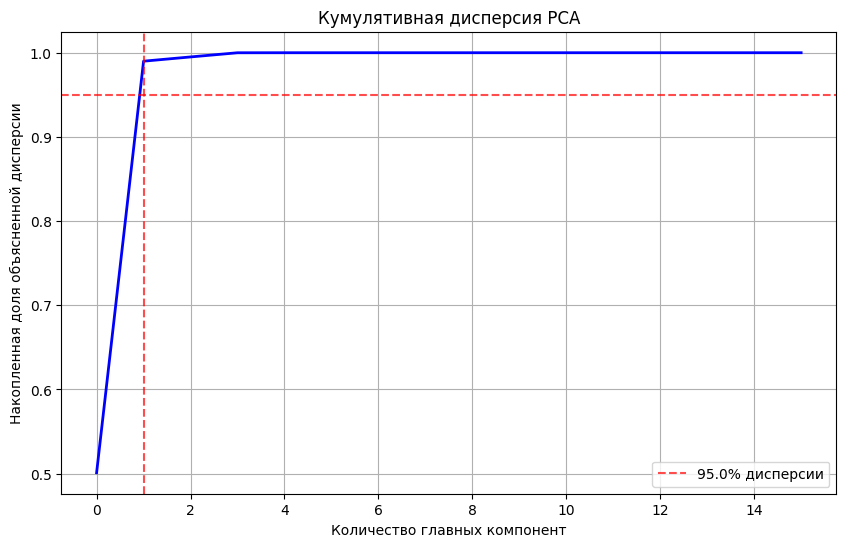

Рекомендуемое количество компонент: 6
Объясненная дисперсия: 0.999


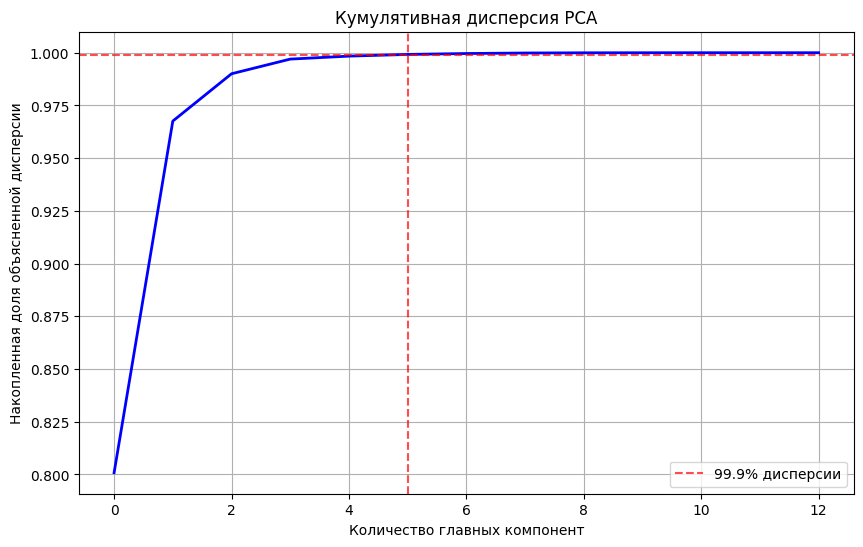

In [70]:
#from utils import apply_pca_analysis_with_graphic
import utils

X_paris_train_pca, X_paris_test_pca, pca_paris = apply_pca_analysis_with_graphic(
    X_paris_train, X_paris_test
)

X_boston_train_pca, X_boston_test_pca, pca_boston = apply_pca_analysis_with_graphic(
    X_boston_train, X_boston_test, variance_threshold=0.999
)


In [71]:
X_paris_train_pca_scaled = scaler_paris.fit_transform(X_paris_train_pca)
X_paris_test_pca_scaled = scaler_paris.transform(X_paris_test_pca)
X_boston_train_pca_scaled = scaler_boston.fit_transform(X_boston_train_pca)
X_boston_test_pca_scaled = scaler_boston.transform(X_boston_test_pca)

mae_boston, mse_boston, r2_boston = build_and_train_model(X_boston_train_pca_scaled, y_boston_train, X_boston_test_pca_scaled, y_boston_test, epochs=200)
mae_paris, mse_paris, r2_paris = build_and_train_model(X_paris_train_pca_scaled, y_paris_train, X_paris_test_pca_scaled, y_paris_test, epochs=200)


print(f"Paris Housing - MAE: {mae_paris}, MSE: {mse_paris}, R2: {r2_paris}")
print(f"Boston Housing - MAE: {mae_boston}, MSE: {mse_boston}, R2: {r2_boston}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Paris Housing - MAE: 2668.189767187492, MSE: 11340129.762015529, R2: 0.9999987052807829
Boston Housing - MAE: 3.0702364800023094, MSE: 19.154709795115007, R2: 0.7388010140805252
